In [1]:
# Mount the drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Connect kaggle to google colab
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Download the dataset
import os
import kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle'
kaggle.api.authenticate()
kaggle.api.dataset_download_files('alarmanovi/gender-recognition-by-voice-2023', unzip=True)

# Gender Recognition By Voice Machine Learning Model

- Dataset from the Kaggle [Link](https://www.kaggle.com/dataset/alarmanovi/gender-recognition-by-voice-2023)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/content/Male and female Voice data creat by al arman ovi .csv')
print(df.shape)
df.head()

(5993, 22)


,mean_freq,sd_freq,median_freq,q25_freq,q75_freq,iqr_freq,skewness,kurtosis_val,spectral_flatness,tempogram,...,peak_freq,mean_fun,min_fun,max_fun,mean_dom,min_dom,max_dom,fund_freq,mod_index,label
0,0.101925,1258.484673,1.101064,0.911917,2.156636,0.001245,616.124085,-0.001148,0.004659,0.000133,...,166.0,0.000019,5.290000e-13,0.000064,0.132647,-0.0,1.0,205.312043,15.314357,male
1,0.141755,1087.412699,2.279823,1.597941,3.019070,0.001421,303.676155,-0.000125,0.000518,0.000146,...,153.0,0.000054,2.821115e-06,0.000133,0.146389,-0.0,1.0,239.989176,29.892067,male
2,0.086956,772.431710,0.833124,0.655712,1.613551,0.000958,517.743718,-0.000878,0.000444,0.000160,...,124.0,0.000011,3.726945e-07,0.000037,0.160206,-0.0,1.0,172.931651,10.603064,male
3,0.272180,754.611927,1.279489,1.062411,1.512505,0.000450,422.531605,0.000301,0.000230,0.000200,...,582.0,0.000013,3.742320e-06,0.000024,0.199956,-0.0,1.0,212.732706,32.122518,male
4,0.158995,634.740672,1.762929,1.479458,2.106728,0.000627,243.829730,0.000654,0.000110,0.000181,...,83.0,0.000071,1.527331e-05,0.000176,0.180945,-0.0,1.0,236.450792,9.935689,male


## Perfoming Explanatory Data Analysis (EDA) of this Dataset

In [6]:
df.columns

Index(['mean_freq', 'sd_freq', 'median_freq', 'q25_freq', 'q75_freq',
       'iqr_freq', 'skewness', 'kurtosis_val', 'spectral_flatness',
       'tempogram', 'mode_freq', 'centroid_freq', 'peak_freq', 'mean_fun',
       'min_fun', 'max_fun', 'mean_dom', 'min_dom', 'max_dom', 'fund_freq',
       'mod_index', 'label'],
      dtype='object')

In [7]:
df.isnull().sum()

mean_freq            0
sd_freq              0
median_freq          0
q25_freq             0
q75_freq             0
iqr_freq             0
skewness             0
kurtosis_val         0
spectral_flatness    0
tempogram            0
mode_freq            0
centroid_freq        0
peak_freq            0
mean_fun             0
min_fun              0
max_fun              0
mean_dom             0
min_dom              0
max_dom              0
fund_freq            0
mod_index            0
label                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5993 entries, 0 to 5992
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_freq          5993 non-null   float64
 1   sd_freq            5993 non-null   float64
 2   median_freq        5993 non-null   float64
 3   q25_freq           5993 non-null   float64
 4   q75_freq           5993 non-null   float64
 5   iqr_freq           5993 non-null   float64
 6   skewness           5993 non-null   float64
 7   kurtosis_val       5993 non-null   float64
 8   spectral_flatness  5993 non-null   float64
 9   tempogram          5993 non-null   float64
 10  mode_freq          5993 non-null   float64
 11  centroid_freq      5993 non-null   float64
 12  peak_freq          5993 non-null   float64
 13  mean_fun           5993 non-null   float64
 14  min_fun            5993 non-null   float64
 15  max_fun            5993 non-null   float64
 16  mean_dom           5993 

In [9]:
df.label.value_counts()

male      3682
female    2311
Name: label, dtype: int64

In [10]:
df.describe()

,mean_freq,sd_freq,median_freq,q25_freq,q75_freq,iqr_freq,skewness,kurtosis_val,spectral_flatness,tempogram,...,centroid_freq,peak_freq,mean_fun,min_fun,max_fun,mean_dom,min_dom,max_dom,fund_freq,mod_index
count,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,...,5993.000000,5993.000000,5993.000000,5.993000e+03,5993.000000,5993.000000,5.993000e+03,5993.0,5993.000000,5993.000000
mean,0.338481,761.020565,1.399165,1.146501,1.847132,0.000701,381.354844,0.000339,0.000707,0.000158,...,1634.933387,152.165360,0.000062,6.727932e-06,0.000159,0.157960,-1.668613e-19,1.0,253.216351,17.448611
std,0.219415,251.631901,0.356573,0.309548,0.475078,0.000316,84.400591,0.001562,0.001516,0.000028,...,369.815453,152.646278,0.000049,1.235205e-05,0.000108,0.027517,1.291748e-17,0.0,79.849107,14.326283
min,0.000000,118.480187,0.262302,0.195782,0.337625,0.000142,89.836751,-0.001594,0.000004,0.000069,...,304.178220,0.000000,0.000002,0.000000e+00,0.000006,0.068926,-1.000000e-15,1.0,74.446723,1.416494
25%,0.170927,574.123400,1.141308,0.920800,1.505274,0.000476,323.128816,-0.000570,0.000154,0.000139,...,1377.076408,63.000000,0.000030,7.644346e-07,0.000083,0.138638,0.000000e+00,1.0,195.598109,9.460127
50%,0.300113,763.274353,1.361954,1.107176,1.806362,0.000636,379.762545,-0.000079,0.000276,0.000158,...,1615.071173,126.000000,0.000047,2.846138e-06,0.000132,0.157960,0.000000e+00,1.0,243.309068,13.772405
75%,0.487619,940.165535,1.622377,1.330819,2.146770,0.000859,439.368299,0.000792,0.000516,0.000177,...,1880.262710,192.000000,0.000078,7.648991e-06,0.000207,0.176736,0.000000e+00,1.0,297.641142,20.540978
max,3.391885,1608.224040,3.356004,3.032274,4.186068,0.002374,679.505785,0.046115,0.059530,0.000252,...,3549.633359,3243.000000,0.000556,3.046583e-04,0.000775,0.252338,-0.000000e+00,1.0,801.780184,237.742628


In [11]:
print(len(df.max_dom.unique()))
print(len(df.min_dom.unique()))
print(len(df.mode_freq.unique()))

1
2
1


In [12]:
df.min_dom.value_counts()

-0.000000e+00    5992
-1.000000e-15       1
Name: min_dom, dtype: int64

In [13]:
df.drop(columns=['max_dom', 'min_dom', 'mode_freq'], inplace=True)

### Transforming label column of the dataset into 0 and 1 which corresponds to female and male respectively.

In [14]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df.label = labelEncoder.fit_transform(df.label)
df.label

0       1
1       1
2       1
3       1
4       1
       ..
5988    0
5989    0
5990    0
5991    0
5992    0
Name: label, Length: 5993, dtype: int64

In [15]:
correlation = df.corr()

In [16]:
correlation['label'].sort_values(ascending=False)

label                1.000000
mean_fun             0.010796
sd_freq              0.004508
spectral_flatness    0.003291
max_fun              0.001343
peak_freq           -0.016836
mod_index           -0.029875
min_fun             -0.033079
iqr_freq            -0.043303
tempogram           -0.063159
mean_dom            -0.063159
skewness            -0.079587
kurtosis_val        -0.115340
mean_freq           -0.128660
q75_freq            -0.200406
centroid_freq       -0.227091
q25_freq            -0.263383
median_freq         -0.271350
fund_freq           -0.342090
Name: label, dtype: float64

### Plotting the Heatmap to showcase the relation between the different features of the dataset

Text(0.5, 1.0, 'Multi-Collinearity of Features')

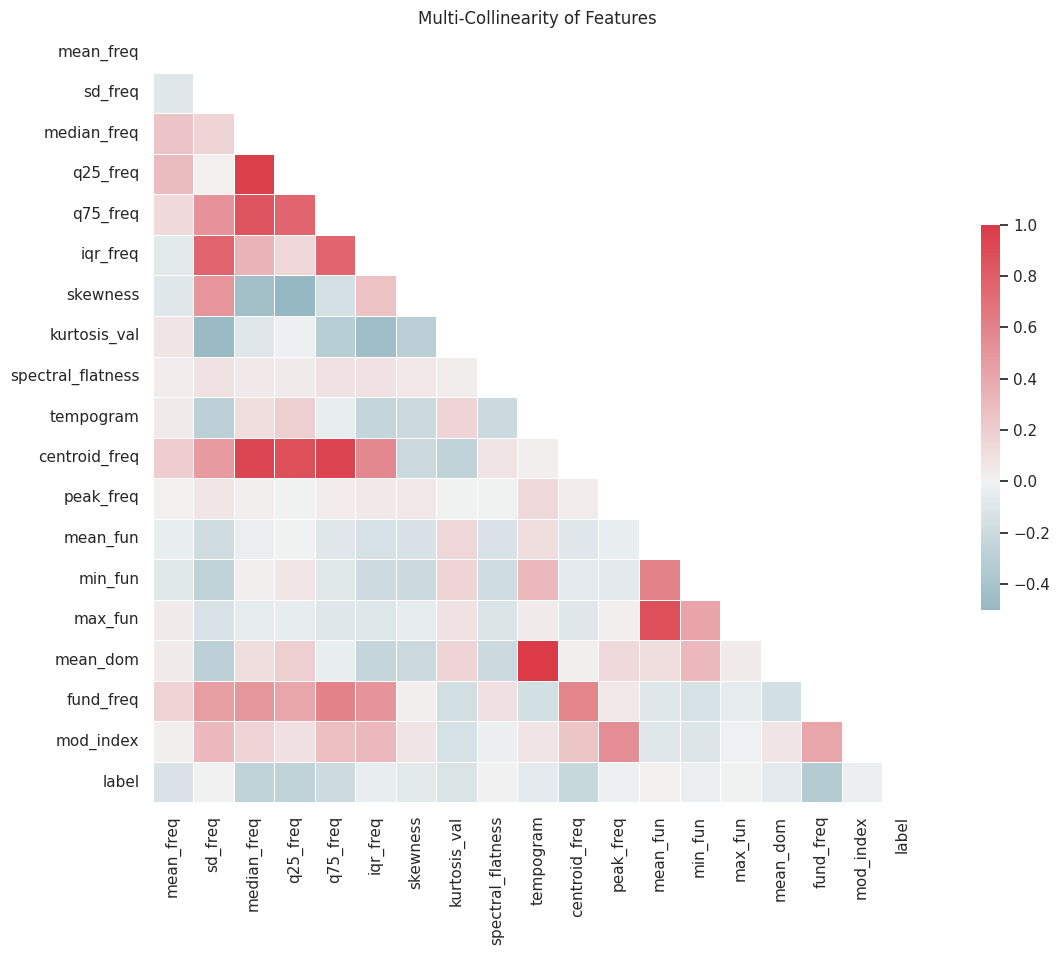

In [17]:
import seaborn as sns

sns.set(style="white")
mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidth=.5, cbar_kws={'shrink': .5})

ax.set_title('Multi-Collinearity of Features')

### Let's plot the graphs correspond to each feature to show the distribution of the each and every features in the dataset

In [18]:
column = np.array(df.columns)
column

array(['mean_freq', 'sd_freq', 'median_freq', 'q25_freq', 'q75_freq',
       'iqr_freq', 'skewness', 'kurtosis_val', 'spectral_flatness',
       'tempogram', 'centroid_freq', 'peak_freq', 'mean_fun', 'min_fun',
       'max_fun', 'mean_dom', 'fund_freq', 'mod_index', 'label'],
      dtype=object)

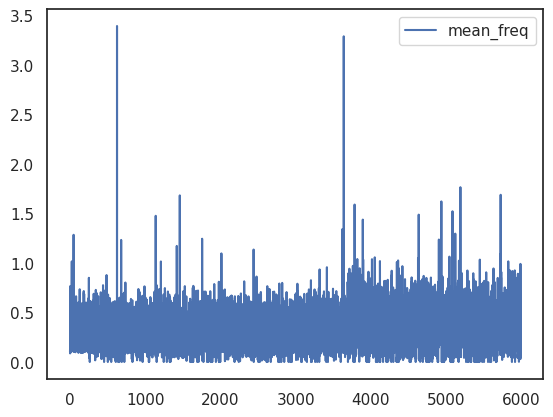

In [19]:
df[column[0]].plot()
plt.legend()

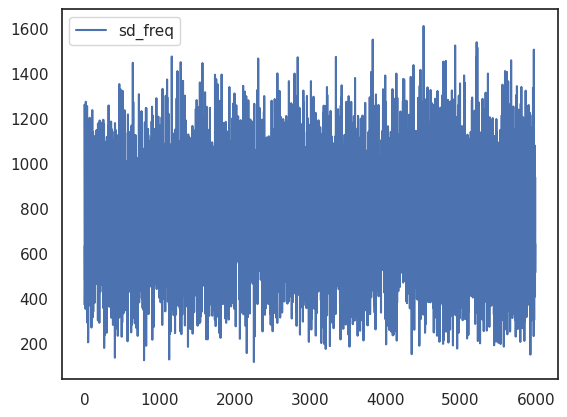

In [20]:
df[column[1]].plot()
plt.legend()

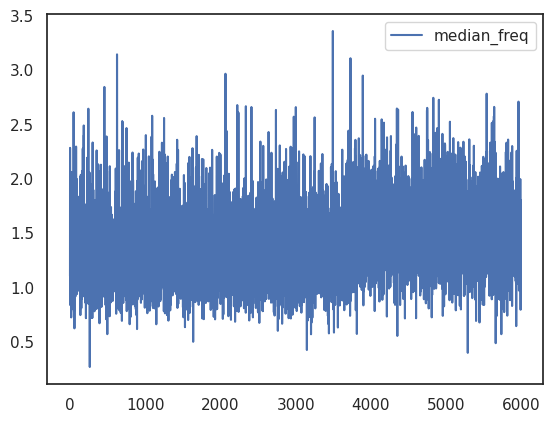

In [21]:
df[column[2]].plot()
plt.legend()

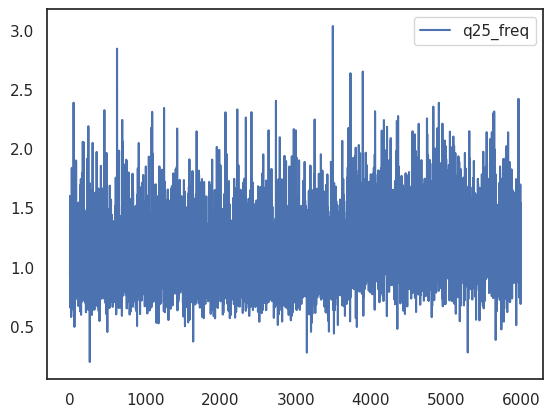

In [22]:
df[column[3]].plot()
plt.legend()

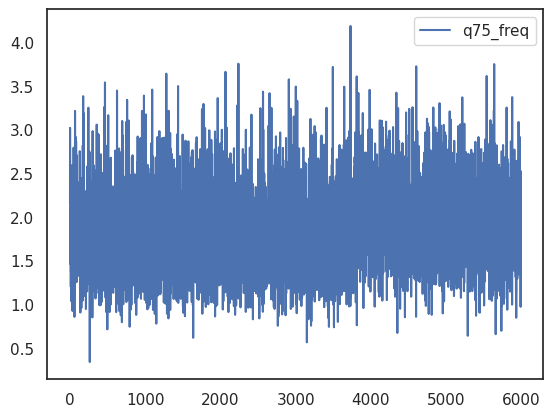

In [23]:
df[column[4]].plot()
plt.legend()

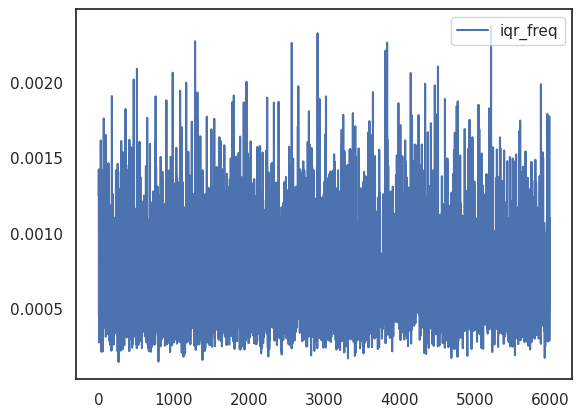

In [24]:
df[column[5]].plot()
plt.legend()

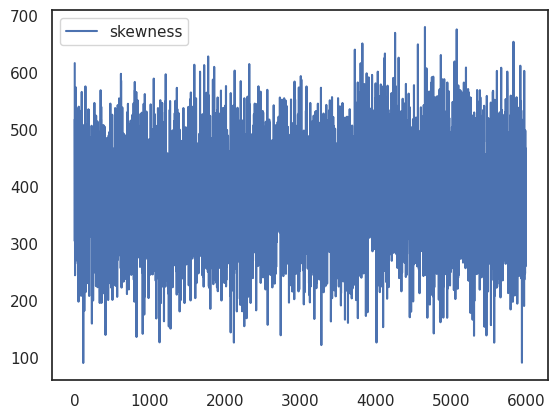

In [25]:
df[column[6]].plot()
plt.legend()

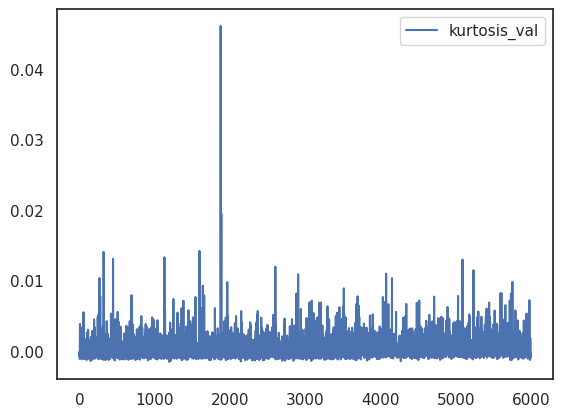

In [26]:
df[column[7]].plot()
plt.legend()

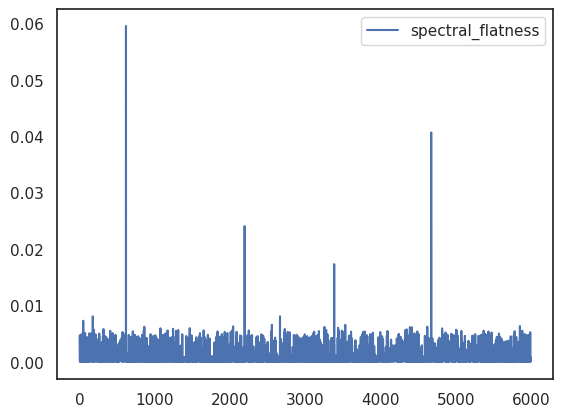

In [27]:
df[column[8]].plot()
plt.legend()

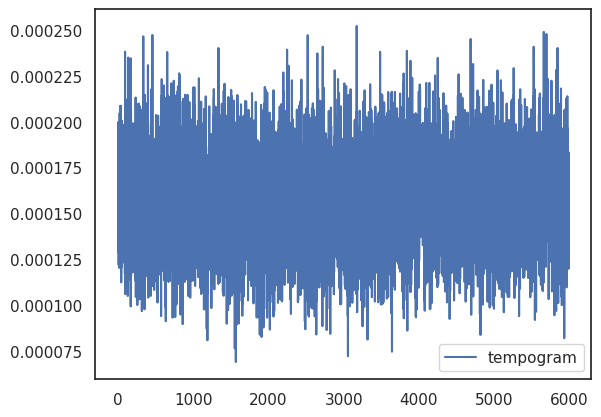

In [28]:
df[column[9]].plot()
plt.legend()

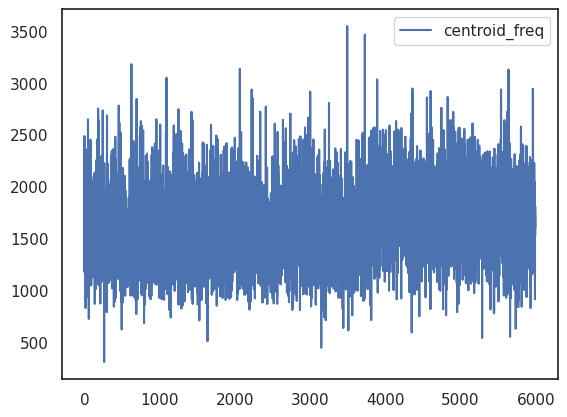

In [29]:
df[column[10]].plot()
plt.legend()

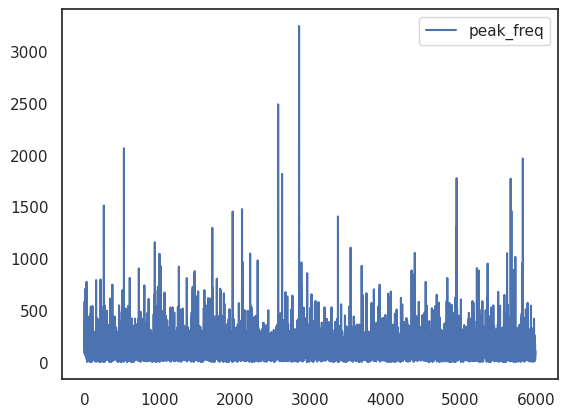

In [30]:
df[column[11]].plot()
plt.legend()

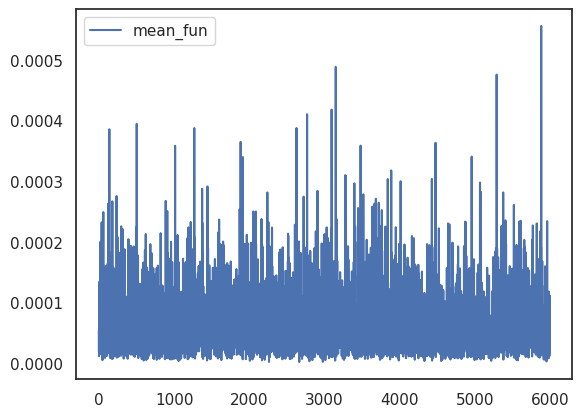

In [31]:
df[column[12]].plot()
plt.legend()

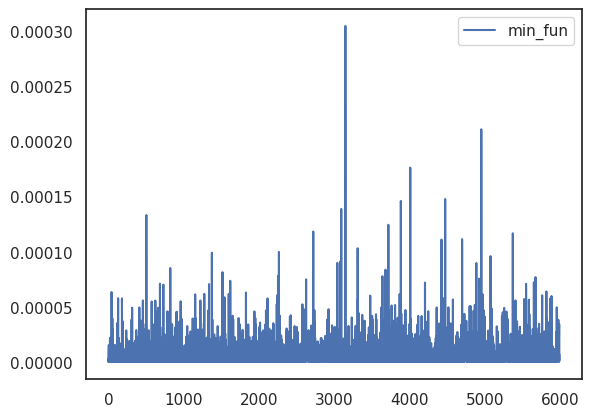

In [32]:
df[column[13]].plot()
plt.legend()

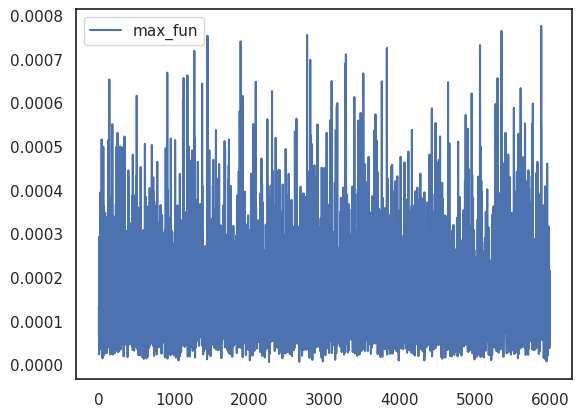

In [33]:
df[column[14]].plot()
plt.legend()

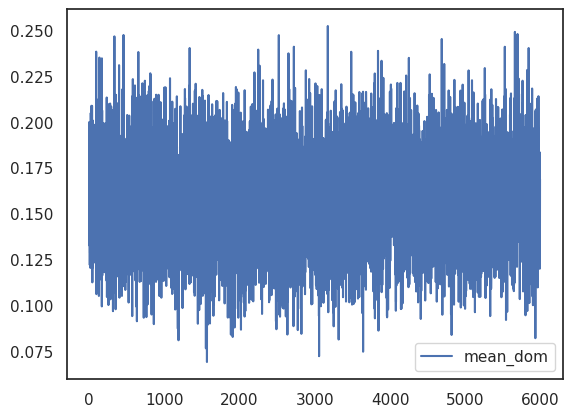

In [34]:
df[column[15]].plot()
plt.legend()

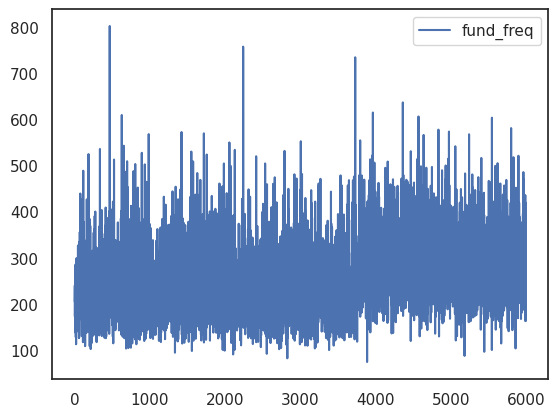

In [35]:
df[column[16]].plot()
plt.legend()

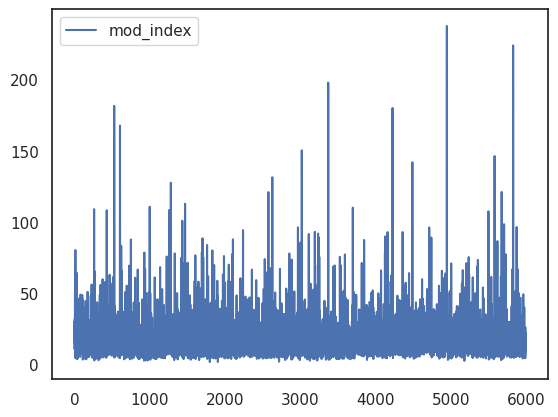

In [36]:
df[column[17]].plot()
plt.legend()

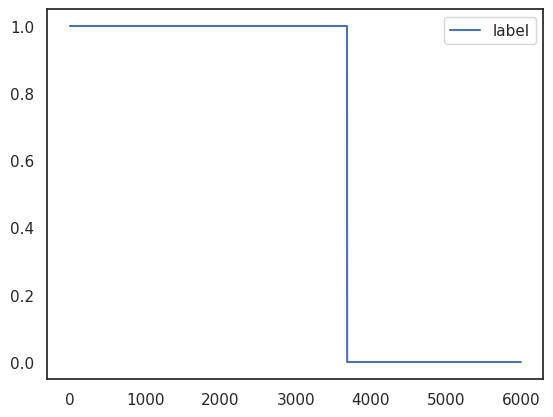

In [37]:
df[column[18]].plot()
plt.legend()

## Let's start building the machine learning models

In [38]:
print(df.shape)
df.head()

(5993, 19)


,mean_freq,sd_freq,median_freq,q25_freq,q75_freq,iqr_freq,skewness,kurtosis_val,spectral_flatness,tempogram,centroid_freq,peak_freq,mean_fun,min_fun,max_fun,mean_dom,fund_freq,mod_index,label
0,0.101925,1258.484673,1.101064,0.911917,2.156636,0.001245,616.124085,-0.001148,0.004659,0.000133,1722.189076,166.0,0.000019,5.290000e-13,0.000064,0.132647,205.312043,15.314357,1
1,0.141755,1087.412699,2.279823,1.597941,3.019070,0.001421,303.676155,-0.000125,0.000518,0.000146,2486.438634,153.0,0.000054,2.821115e-06,0.000133,0.146389,239.989176,29.892067,1
2,0.086956,772.431710,0.833124,0.655712,1.613551,0.000958,517.743718,-0.000878,0.000444,0.000160,1172.361957,124.0,0.000011,3.726945e-07,0.000037,0.160206,172.931651,10.603064,1
3,0.272180,754.611927,1.279489,1.062411,1.512505,0.000450,422.531605,0.000301,0.000230,0.000200,1498.935592,582.0,0.000013,3.742320e-06,0.000024,0.199956,212.732706,32.122518,1
4,0.158995,634.740672,1.762929,1.479458,2.106728,0.000627,243.829730,0.000654,0.000110,0.000181,1896.108756,83.0,0.000071,1.527331e-05,0.000176,0.180945,236.450792,9.935689,1


In [39]:
# Create a copy of the formed dataframe
data = df.copy()

In [40]:
x = data.drop('label', axis=1)
y = data['label']

print(x.shape)
print(y.shape)

(5993, 18)
(5993,)


##### Splitting the dataset into training and testing dataset to train the models

In [41]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

print('Training Dataset:', xtrain.shape, ytrain.shape)
print('Testing Dataset:', xtest.shape, ytest.shape)

Training Dataset: (4794, 18) (4794,)
Testing Dataset: (1199, 18) (1199,)


### Now, Let's Build the different models and train them

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost.sklearn import XGBRegressor


#### Create a DataFrame to store the accuracies of the different models

In [43]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
results = pd.DataFrame(columns=['Model', 'MSE', 'R2'])


#### Linear Regression Model

In [44]:
lr_model = LinearRegression()
lr_model.fit(xtrain, ytrain)

LinearRegression()

In [45]:
ypred = lr_model.predict(xtest)

mse = MSE(ytest, ypred)
r2 = R2(ytest, ypred)

results.loc[len(results)] = ['Linear Regression', mse, r2]

#### Ridge Regression Model

In [46]:
ridge = Ridge()
ridge.fit(xtrain, ytrain)

Ridge()

In [47]:
ypred = ridge.predict(xtest)

mse = MSE(ytest, ypred)
r2 = R2(ytest, ypred)

results.loc[len(results)] = ['Ridge Regression', mse, r2]

#### Elastic Net Regressor Model

In [48]:
elastic = ElasticNet()
elastic.fit(xtrain, ytrain)

ElasticNet()

In [49]:
ypred = elastic.predict(xtest)

mse = MSE(ytest, ypred)
r2 = R2(ytest, ypred)

results.loc[len(results)] = ['Elastic Net Regression', mse, r2]

#### SGD Regressor Model

In [50]:
sgd = SGDRegressor()
sgd.fit(xtrain, ytrain)

SGDRegressor()

In [51]:
ypred = sgd.predict(xtest)

mse = MSE(ytest, ypred)
r2 = R2(ytest, ypred)

results.loc[len(results)] = ['SGD Regression', mse, r2]

#### Decision Tree Regression Model

In [52]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [53]:
ypred = dtr.predict(xtest)

mse = MSE(ytest, ypred)
r2 = R2(ytest, ypred)

results.loc[len(results)] = ['Decision Tree Regression', mse, r2]

#### Gradient Boosting Regression Model

In [54]:
gbr = GradientBoostingRegressor()
gbr.fit(xtrain, ytrain)

GradientBoostingRegressor()

In [55]:
ypred = gbr.predict(xtest)

mse = MSE(ytest, ypred)
r2 = R2(ytest, ypred)

results.loc[len(results)] = ['Gradient Boosting Regression', mse, r2]

#### Random Forest Regressor Model

In [56]:
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)

RandomForestRegressor()

In [57]:
ypred = rfr.predict(xtest)

mse = MSE(ytest, ypred)
r2 = R2(ytest, ypred)

results.loc[len(results)] = ['Random Forest Regression', mse, r2]

#### XG Boost Regression Model

In [58]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
ypred = xgb.predict(xtest)

mse = MSE(ytest, ypred)
r2 = R2(ytest, ypred)

results.loc[len(results)] = ['XG Boost Regression', mse, r2]

### Let's us Now build and train a deep neural network on the dataset

In [60]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=xtrain.shape[1],))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2432      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,313
Trainable params: 13,313
Non-traina

In [61]:
# Let's fit the dataset on the deep neural network and train it
model.fit(xtrain, ytrain, epochs=1000, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/1000
150/150 [==============================] - 5s 8ms/step - loss: 1.2235 - val_loss: 0.8864
Epoch 2/1000
150/150 [==============================] - 1s 7ms/step - loss: 0.7927 - val_loss: 0.7150
Epoch 3/1000
150/150 [==============================] - 1s 6ms/step - loss: 0.6765 - val_loss: 0.6308
Epoch 4/1000
150/150 [==============================] - 1s 3ms/step - loss: 0.6065 - val_loss: 0.5714
Epoch 5/1000
150/150 [==============================] - 0s 3ms/step - loss: 0.5690 - val_loss: 0.5400
Epoch 6/1000
150/150 [==============================] - 0s 3ms/step - loss: 0.5351 - val_loss: 0.5129
Epoch 7/1000
150/150 [==============================] - 0s 3ms/step - loss: 0.5093 - val_loss: 0.4897
Epoch 8/1000
150/150 [==============================] - 0s 3ms/step - loss: 0.4879 - val_loss: 0.4711
Epoch 9/1000
150/150 [==============================] - 0s 3ms/step - loss: 0.4709 - val_loss: 0.4567
Epoch 10/1000
150/150 [==============================] - 0s 3ms/step - loss: 0.456

In [62]:
ypred = model.predict(xtest)

mse = MSE(ytest, ypred)
r2 = R2(ytest, ypred)

results.loc[len(results)] = ['Deep NN', mse, r2]

38/38 [==============================] - 0s 2ms/step


### Now, Let's watch accuracies of all the models in the increasing order of MSE

In [63]:
results = results.sort_values(by='MSE', ascending=True)
results

,Model,MSE,R2
5,Gradient Boosting Regression,1.406672e-01,4.031331e-01
6,Random Forest Regression,1.435905e-01,3.907292e-01
7,XG Boost Regression,1.505178e-01,3.613356e-01
0,Linear Regression,1.718679e-01,2.707449e-01
1,Ridge Regression,1.809122e-01,2.323690e-01
2,Elastic Net Regression,1.854163e-01,2.132574e-01
8,Deep NN,2.566216e-01,-8.887454e-02
4,Decision Tree Regression,2.777314e-01,-1.784462e-01
3,SGD Regression,2.557489e+29,-1.085172e+30


- Here we can see that R2 Score and Mean Absolute Error is best for Gradient Boosting Regression Model.

## Gradient Boosting Regression is best fit for recognizing the gender by voices, let's visualize its results.

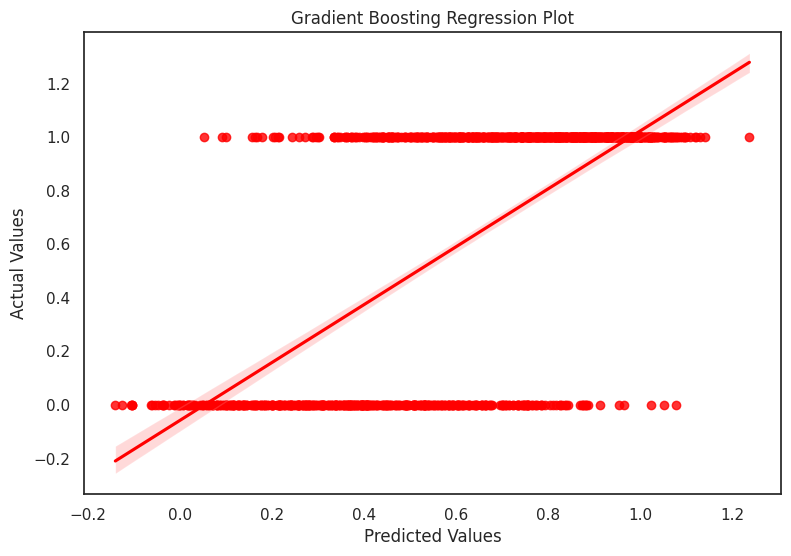

In [64]:
ypred = gbr.predict(xtest)

# Creating regression plot to visualize the model performance
plt.figure(figsize=(9,6))

sns.regplot(x=ypred, y=ytest, color='red')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Gradient Boosting Regression Plot')

plt.show()


In [65]:
plot_df = pd.DataFrame({'pred':ypred.flatten() , 'actual':ytest})

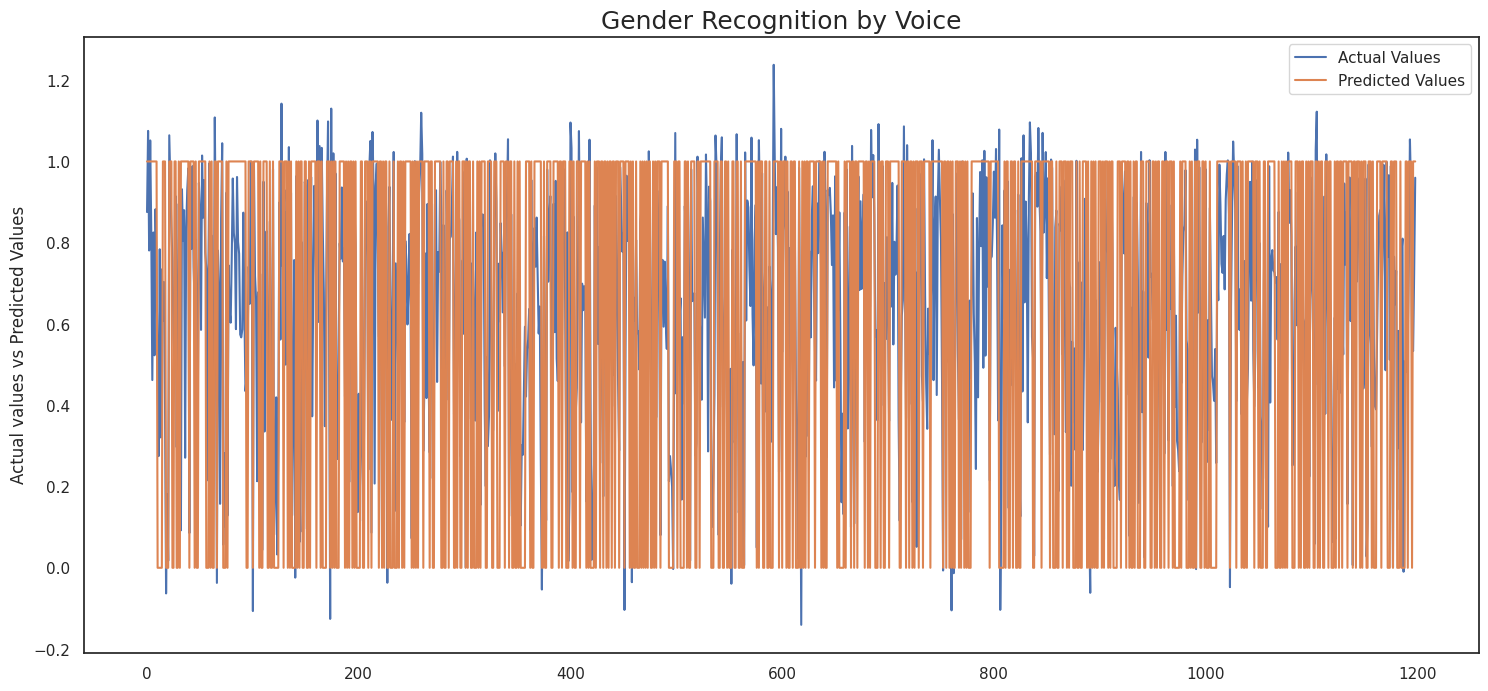

In [66]:
# Creating plot for actual vs Predicted values
plt.figure(figsize=(18,8))

plt.plot(plot_df['pred'].tolist(), label='Actual Values')
plt.plot(plot_df['actual'].tolist(), label='Predicted Values')

plt.ylabel('Actual values vs Predicted Values')
plt.title('Gender Recognition by Voice', fontsize=18)

plt.legend()
plt.show()
